# **Energy Consumption**

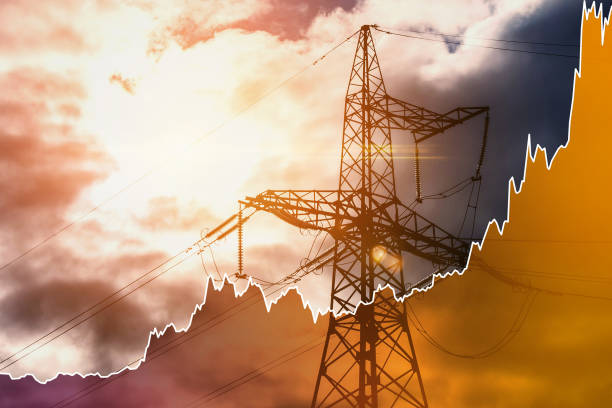

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Loading data
df_energy = pd.read_csv('/content/drive/MyDrive/Colab_Portfolio/project4_energyconsumption/energy_dataset.csv')


In [4]:
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

The dataset contains **28 numerical variables** grouped into the following domains:


1. Conventional fossil generation
2. Renewable generation (solar, wind, biomass, hydro)
3. Hydro pumped storage (generation and consumption)
4. Forecast variables (day-ahead solar and wind)
5. Load indicators (total load forecast and actual)
6. Market price indicators (day-ahead and actual)


Several variables representing specific energy sources (oil shale, peat, coal-derived gas, geothermal) exhibit constant zero values throughout the dataset, indicating the absence of these technologies in the observed system.

In [6]:
# Missing columns
df_energy.isnull().sum()

,0
time,0
generation biomass,19
generation fossil brown coal/lignite,18
generation fossil coal-derived gas,18
generation fossil gas,18
generation fossil hard coal,18
generation fossil oil,19
generation fossil oil shale,18
generation fossil peat,18
generation geothermal,18


In [7]:
# percentage of missing values in each column
missing_percentage = df_energy.isnull().mean() * 100
print(missing_percentage)

time                                             0.000000
generation biomass                               0.054187
generation fossil brown coal/lignite             0.051335
generation fossil coal-derived gas               0.051335
generation fossil gas                            0.051335
generation fossil hard coal                      0.051335
generation fossil oil                            0.054187
generation fossil oil shale                      0.051335
generation fossil peat                           0.051335
generation geothermal                            0.051335
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.054187
generation hydro run-of-river and poundage       0.054187
generation hydro water reservoir                 0.051335
generation marine                                0.054187
generation nuclear                               0.048483
generation other                                 0.051335
generation oth

From above we can clearly see that percentage of missing in column "generation hydro pumped storage aggregated" and "forecast wind offshore eday ahead" is 100 percent. Therefore, we can remove these columns from the dataset.

In [8]:
# removing empty columns
drop_col = ["generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"]
df_energy.drop(drop_col, axis=1, inplace=True)

## **Descriptive Statistics**

 Descriptive statistics are simple tools that help us understand and summarize data. They show the basic features of a dataset, like the average, highest and lowest values and how spread out the numbers are. It's the first step in making sense of information.

 This report provides a comprehensive descriptive analysis of an electricity system dataset comprising approximately 35,000 hourly observations. The dataset includes detailed records of electricity generation by fuel type, renewable energy output, pumped-storage operations, system load (forecast and actual), and market price indicators. The purpose of this analysis is to identify the characteristics, distributional properties, and underlying patterns of the variables in preparation for forecasting, modeling, and exploratory work.

In [9]:
print(df_energy.describe())


       generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            412

From the descriptive analysis above, we can clearly see that some of the columns have all zero values meaning these variables are zero for all the observations and also contains missing based on the above analysis. Therefore, these columns should removed as they are not providing any information.

In [10]:
drop_col2 = ["generation fossil coal-derived gas", "generation fossil oil shale", "generation fossil peat", "generation geothermal", "generation wind offshore", "generation marine" ]
df_energy.drop(drop_col2, axis = 1, inplace = True)

In [11]:
df_energy

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [12]:
# Check for duplicate rows
duplicate_rows = df_energy.duplicated().sum()

# Check for duplicate columns
duplicate_columns = df_energy.columns[df_energy.columns.duplicated()].tolist()

# Print the duplicates
print("Duplicate rows count:", duplicate_rows)
print("Duplicate columns:", duplicate_columns)

# Drop duplicate rows
#df = df_energy.drop_duplicates()

Duplicate rows count: 0
Duplicate columns: []


In [13]:
# Time preprocessing
# Converting time to datetime index
df_energy["time"] = pd.to_datetime(df_energy["time"])
df_energy = df_energy.sort_values("time")
df_energy.set_index("time", inplace=True)

/tmp/ipython-input-4117497287.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_energy["time"] = pd.to_datetime(df_energy["time"])


In [14]:
# Setting target variable
load_actual = df_energy["total load actual"]
price_actual = df_energy["price actual"]

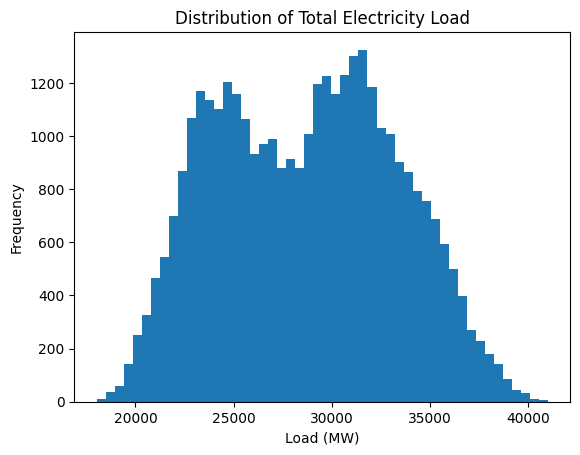

In [15]:
# Load distribution
plt.figure()
plt.hist(load_actual.dropna(), bins=50)
plt.title("Distribution of Total Electricity Load")
plt.xlabel("Load (MW)")
plt.ylabel("Frequency")
plt.show()


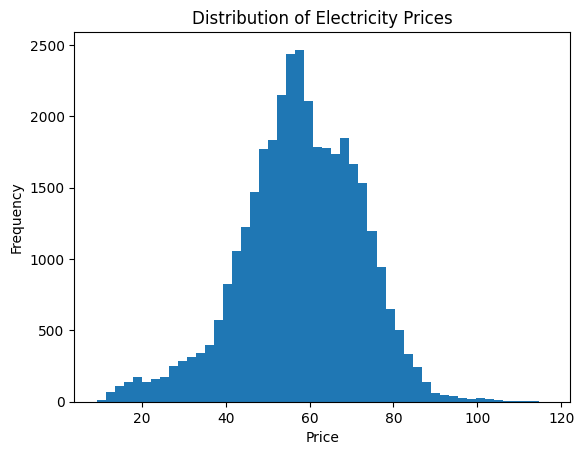

In [16]:
# Price distribution
plt.figure()
plt.hist(price_actual.dropna(), bins=50)
plt.title("Distribution of Electricity Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

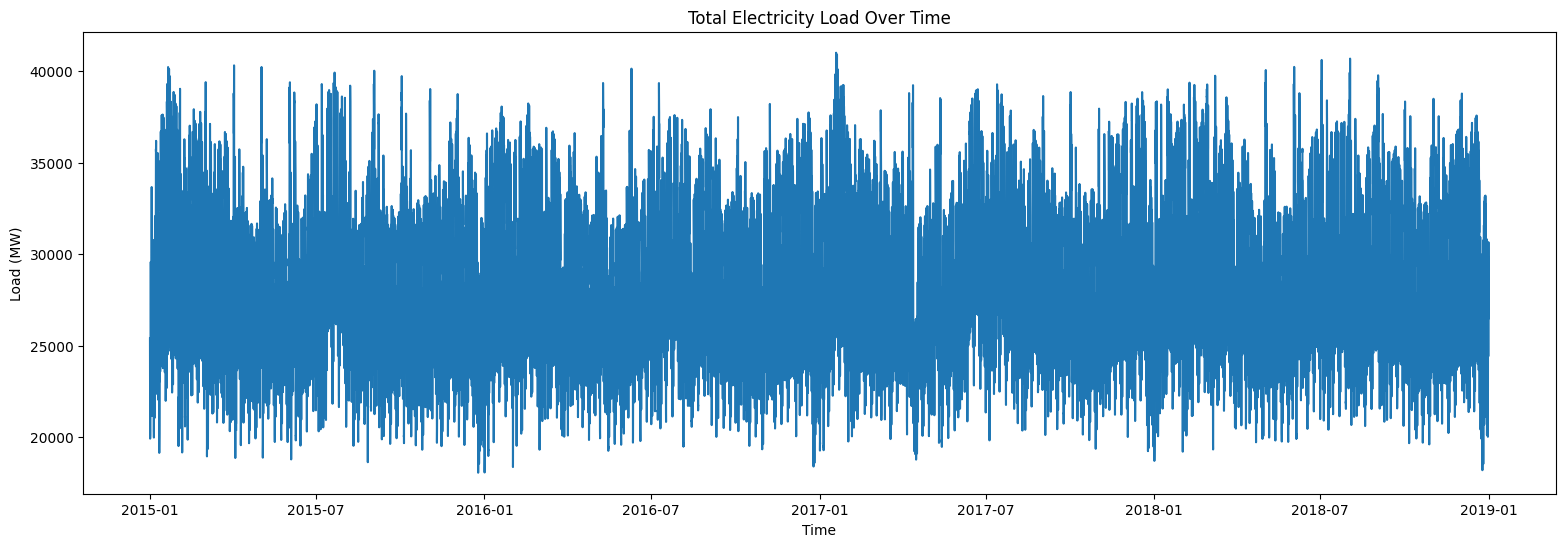

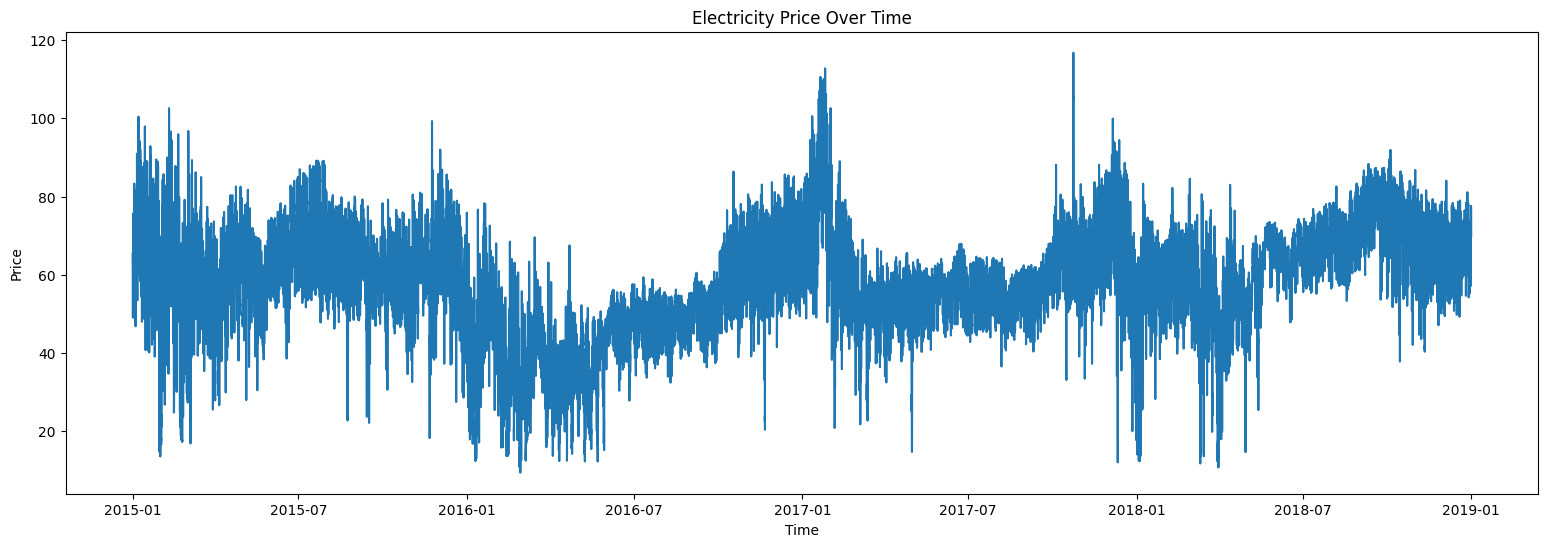

In [20]:
# Time Series Analysis
plt.figure(figsize=(19, 6))
plt.plot(load_actual)
plt.title("Total Electricity Load Over Time")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.show()

plt.figure(figsize=(19, 6))
plt.plot(price_actual)
plt.title("Electricity Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


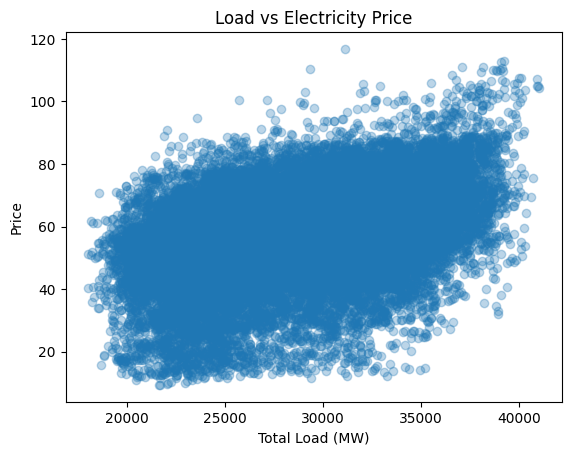

In [21]:
# Load vs Price scatter plot
plt.figure()
plt.scatter(load_actual, price_actual, alpha=0.3)
plt.title("Load vs Electricity Price")
plt.xlabel("Total Load (MW)")
plt.ylabel("Price")
plt.show()

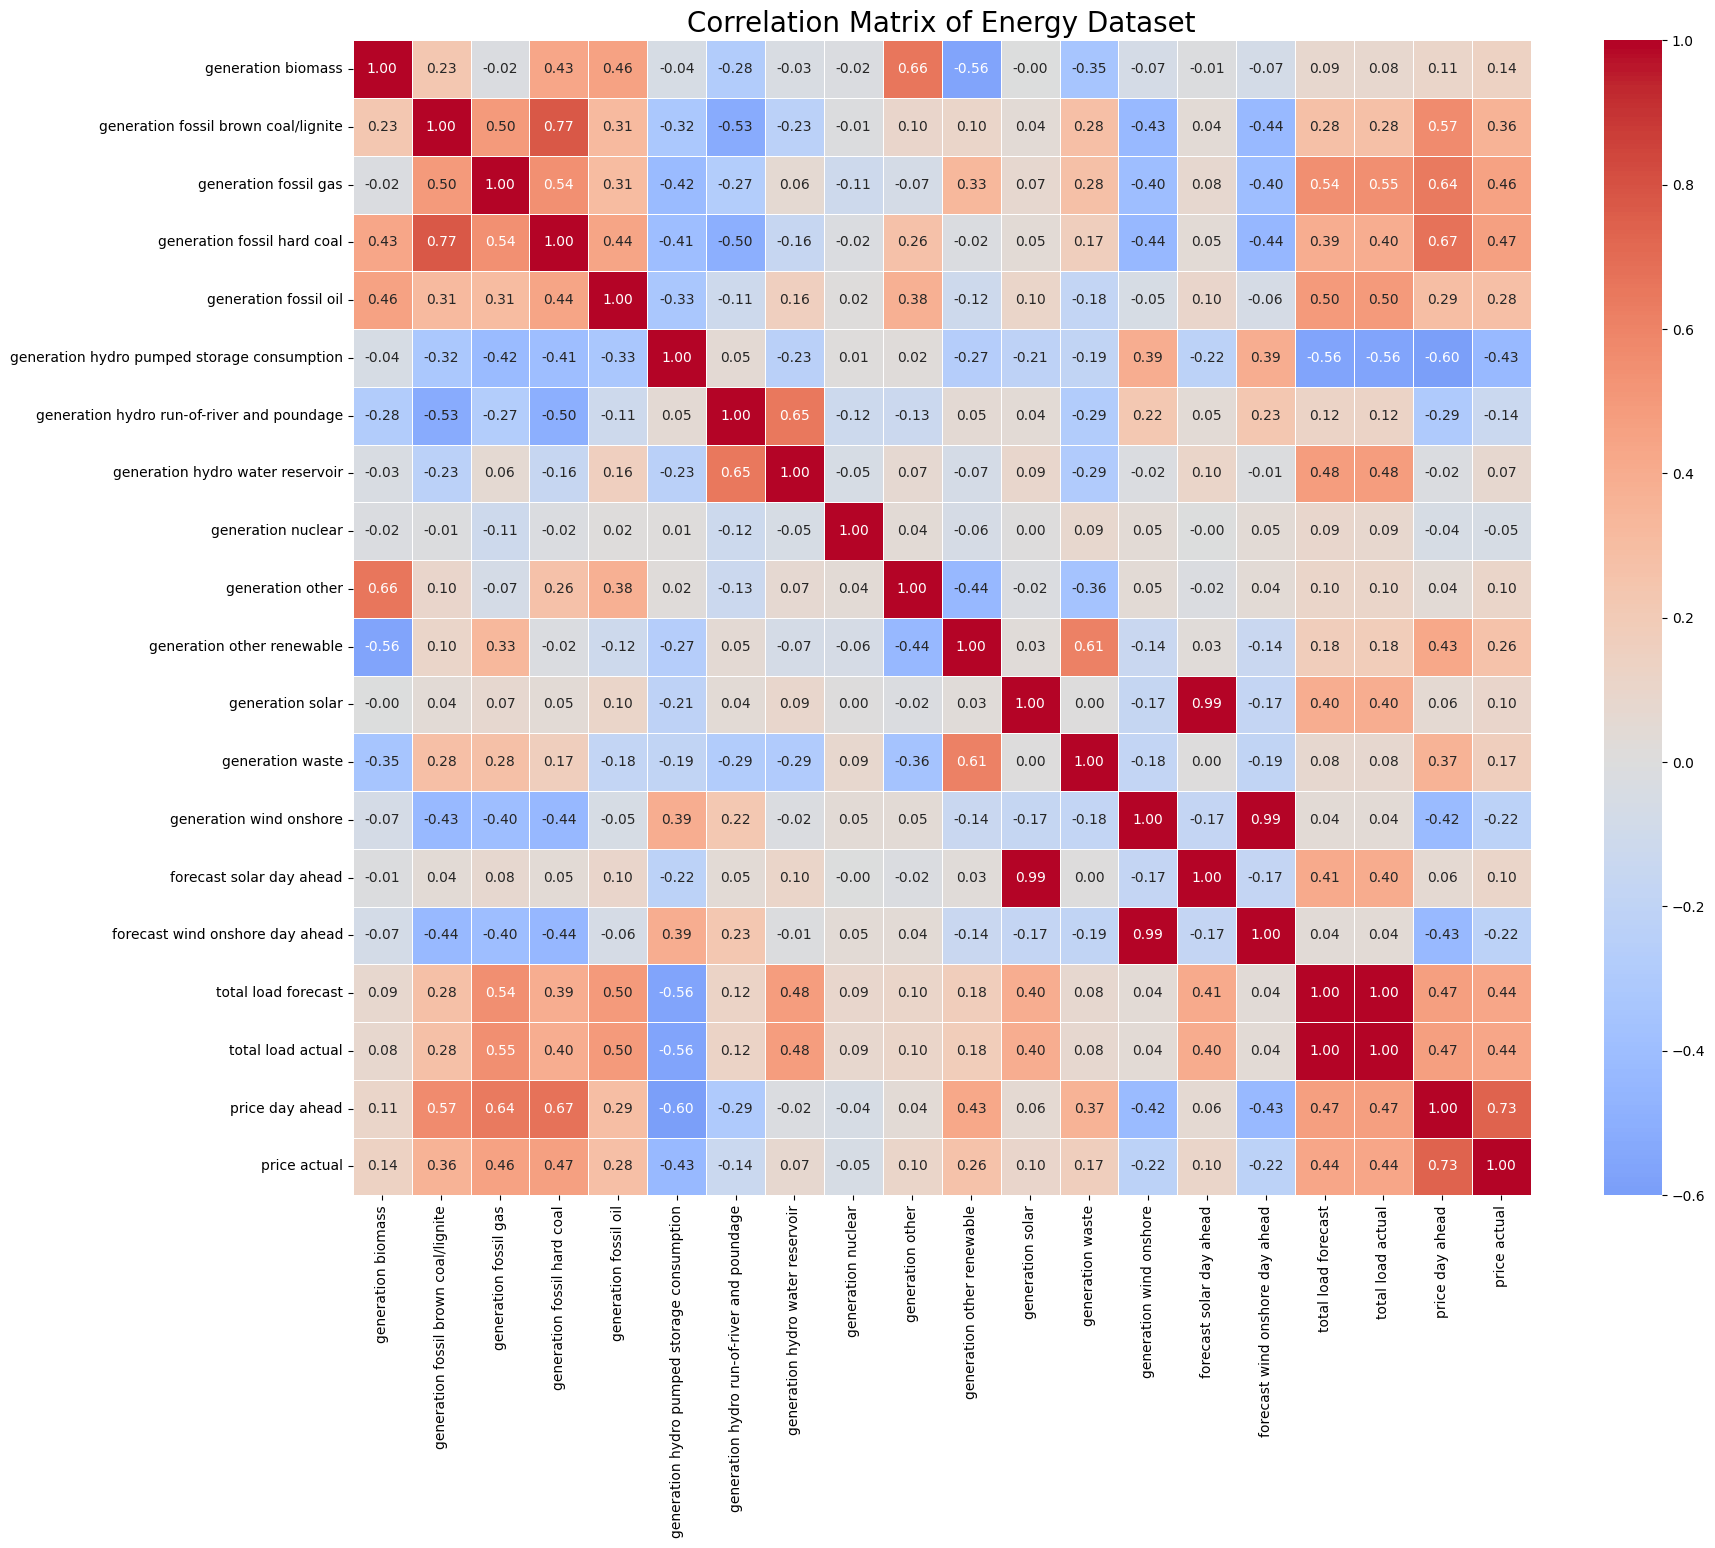

In [22]:
# Correlation Matrix
corr_matrix = df_energy.corr()

# Plot the heatmap
f = plt.figure(figsize=(19, 15))
sns.heatmap(corr_matrix,
            annot=True,         # Annotate cells with the correlation values
            cmap='coolwarm',    # Choose a color map (coolwarm, RdYlGn, etc.)
            fmt=".2f",          # Format the annotations to two decimal places
            linewidths=0.5,     # Add lines between cells
            center=0)           # Center the color map at 0 correlation
plt.title('Correlation Matrix of Energy Dataset', fontsize=20)
plt.show()

In [23]:
# Fossil vs renewable fuel analysis

df_energy["fossil_generation"] = (
    df_energy["generation fossil gas"] +
    df_energy["generation fossil hard coal"] +
    df_energy["generation fossil brown coal/lignite"]
)

df_energy["renewable_generation"] = (
    df_energy["generation solar"] +
    df_energy["generation wind onshore"] +
    df_energy["generation hydro water reservoir"] +
    df_energy["generation hydro run-of-river and poundage"] +
    df_energy["generation other renewable"]
)

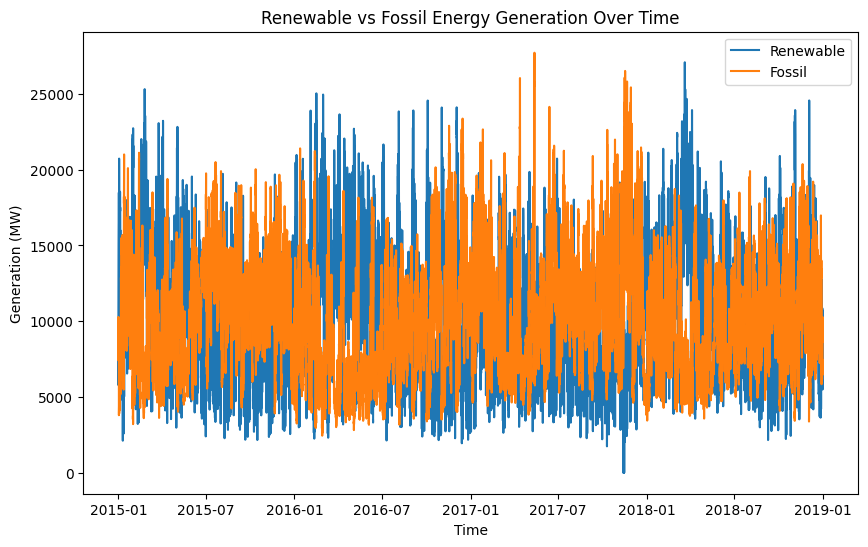

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df_energy["renewable_generation"], label="Renewable")
plt.plot(df_energy["fossil_generation"], label="Fossil")
plt.legend()
plt.title("Renewable vs Fossil Energy Generation Over Time")
plt.xlabel("Time")
plt.ylabel("Generation (MW)")
plt.show()

**EDA Summary:**
- Electricity demand shows strong daily and seasonal patterns.
- Prices are volatile and moderately correlated with demand.
- Fossil gas generation is highly correlated with both load and price.
- Renewable generation shows a price-suppressing effect.
- Dataset is suitable for time-series forecasting and regression modeling.